<a href="https://colab.research.google.com/github/profcintiapinho/python_basico/blob/main/2_ExemploAnalisedasInscricoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Simples - Inscrições do Curso

### Após a Aula introdutória vamos ver como colher algumas informações Simples Usando Python

In [ ]:
import pandas as pd #Biblioteca responsável para fazer a leitura e impressão de bases de dados

### Veja neste link como armazenar uma planilha excel no Github para usar como base de dados no COLAB

In [ ]:
url = 'https://github.com/profcintiapinho/laboratorio_ia/blob/main/respostasalunos.xlsx?raw=true' #pega o caminho do arquivo excel no github
planilha = "respostas" #identifica a planilha que está os dados
base = pd.read_excel(url,planilha) #pega o caminho e a planilha exata e armazena na variável

In [ ]:
base

,Turma,interesse,computador,motivacao
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q..."
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos
...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática


In [ ]:
import matplotlib.pyplot as plt #biblioteca para gerar gráficos
import seaborn as sns #biblioteca para visualizar gráficos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


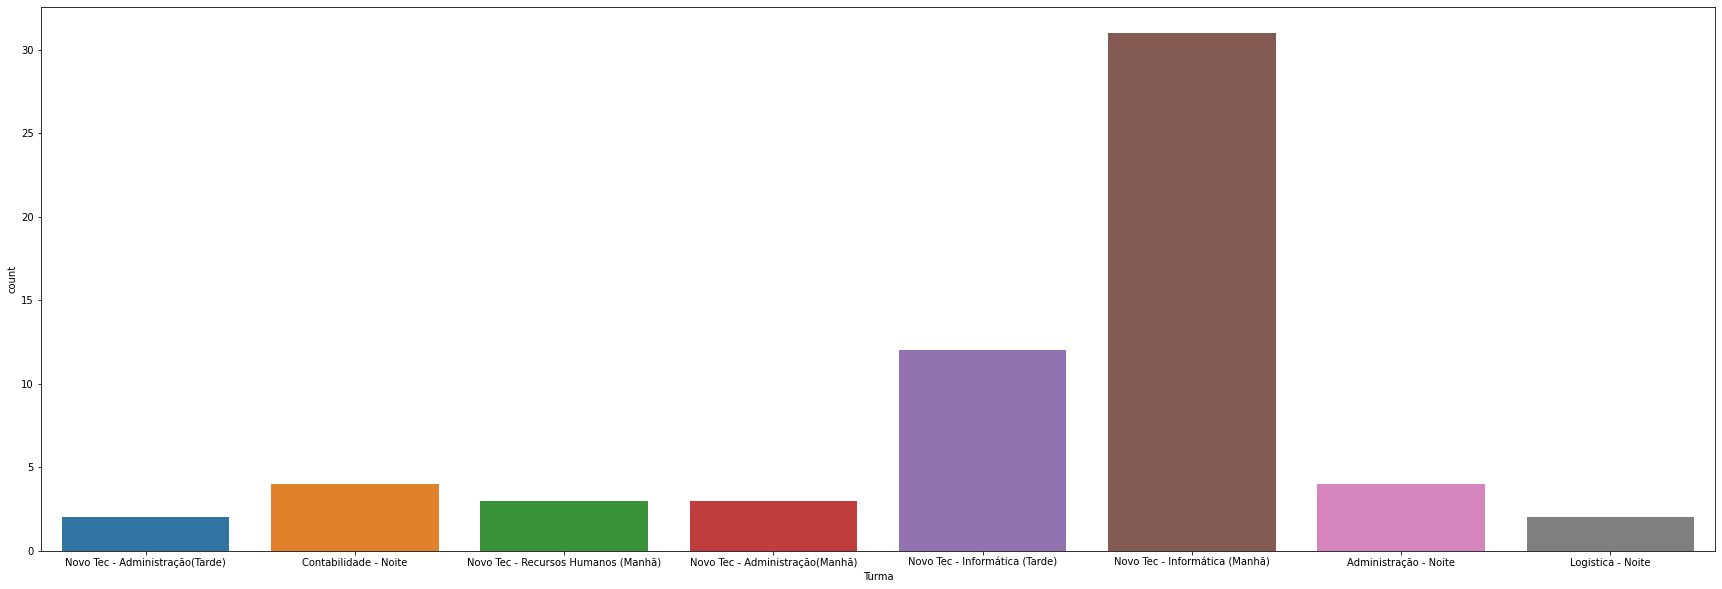

In [ ]:
plt.subplots(figsize=(30, 10))
sns.countplot(base.Turma);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Alunos possuem computadores?')

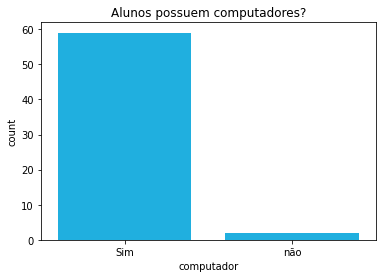

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(base['computador'], color='#00BFFF');
plt.title('Alunos possuem computadores?')

In [ ]:
base['interesse'].value_counts()

Tarde    31
Noite    30
Name: interesse, dtype: int64

In [ ]:
tarde = base.interesse.value_counts()['Tarde']
noite = base.interesse.value_counts()['Noite']

In [ ]:
x = ["Tarde", "Noite"]
y = [tarde, noite]

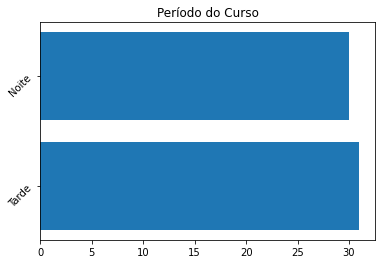

In [ ]:
plt.barh(x, y)
plt.yticks(rotation=45)
plt.title('Período do Curso')
plt.show()

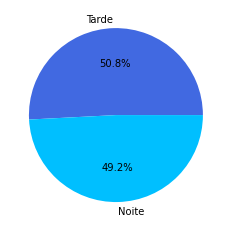

In [ ]:
cores = ['#4169E1','#00BFFF','#00008B']
plt.pie(y, labels=x, autopct='%1.1f%%', colors = cores)
plt.show()

In [ ]:
import spacy
import re

In [ ]:
!python -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.5 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186282 sha256=382b6e630a5fc85ebd77238ca941b569e2dc1dedd5cd865d85923f677e28a270
  Stored in directory: /tmp/pip-ephem-wheel-cache-o_qo58er/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
pln = spacy.load('pt')

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
import string
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(text):
    result = []
    pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    texto = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', text )
    doc = pln(texto.lower()) # Transformando em minúsculo
    for token in doc:
        # 3
        if(token.text in stop_words or token.text in pontuacoes):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)
                
        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()]) 
         
                
    #return result # 5
    return texto # 5

In [ ]:
base.motivacao=base.motivacao.astype(str)
base['limpa'] = base['motivacao'].apply(preprocessamento)

In [ ]:
base

,Turma,interesse,computador,motivacao,limpa
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...,liga aprender tecnologia
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...,conseguir automatizar processos trabalho
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q...",obter conhecimento solicitado mercado trabalho
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...,python linguagens programação fácil executar p...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos,aprimorar
...,...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...,busca conhecimentos agregar vida
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática,ampliar conhecimentos informática


In [ ]:
motivo = base['limpa'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

In [ ]:
juntandotudo

'liga aprender tecnologia conseguir automatizar processos trabalho obter conhecimento solicitado mercado trabalho python linguagens programação fácil executar projetos sabendo python aprimorar aprimorar venho interessando tecnologia conhecimento adquirir conhecimentos agregar currículo achei interessante curso melhorar conhecimento python interessei gosto programação estudei python conhecimento indicação documentário coded bias desenvolvi interesse ia expandir conhecimentos futuro melhor incrementar currículo interesse interesse explorar áreas informática estudei python conhecer mexe funciona adquirir conhecimento busco melhor capacitação ingressar mercado trabalho interesse tema curso gosto aprender coisas acredito oportunidade aparece agarrada tema curso desperta interesse experiência area interesse ia aprender tecnologias atuais ampliar conhecimento áreae decidindo profissãoe aprender fundamental aprender coisas tornar profissional qualificado curiosidade desenvolvimento ia python g

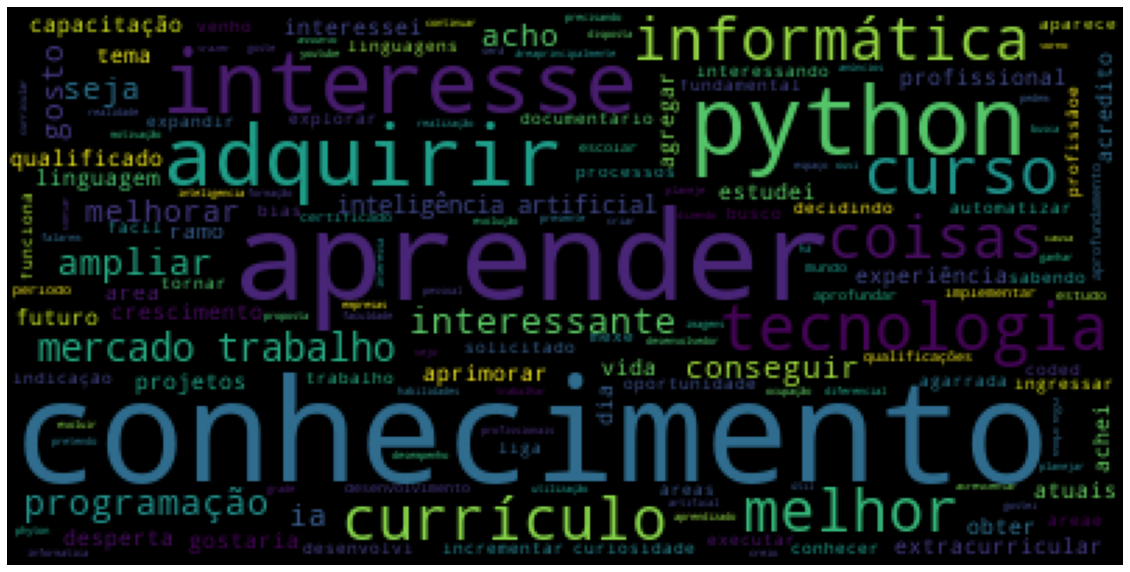

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(juntandotudo))